# Part I - (Exploration du Dataset Ford GoBike)
## by Yenika Djasnive RAJAONA 

## Table des matières
> - <a href="#introduction">Introduction</a>
> - <a href="#wrangling">Primary Wrangling</a>
> - <a href="#univarie">Exploration Univarié</a>
> - <a href="#bivarie">Exploration Bivarié</a>
> - <a href="#mutlivarie">Exploration Multivarié</a>
> - <a href="#conclusions">Conclusions</a>


<span id="introduction"></span>
## Introduction
> ### Présentation du Dataset

Il s'agit d'une analyse de données sur les trajets des velos à usage public

> ### Information sur les conlonnes du Dataset

- Durée du trajet en seconde
- Date et heure de début
- Date et heure de fin
- Identification de la station de départ
- Nom de la station de départ
- Latitude de la station de départ
- Longitude de la station de départ
- Identification de la station d'arrivée
- Nom de la station d'arrivée
- Latitude de la station d'arrivée
- Longitude de la station d'arrivée
- Identification de la bicyclette
- Type d'utilisateur (Abonné ou Client – « Abonné » = Membre ou « Client » = Occasionnel)
- Année de naissance du membre
- Genre du membre
- Velo Tout terrain ou pas

<span id="wrangling"></span>
## Preliminary Wrangling

In [1]:
# import des packages nécéssaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# importer le dataset
df = pd.read_csv("201902-fordgobike-tripdata.csv")

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
# Information general sur le dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


[]

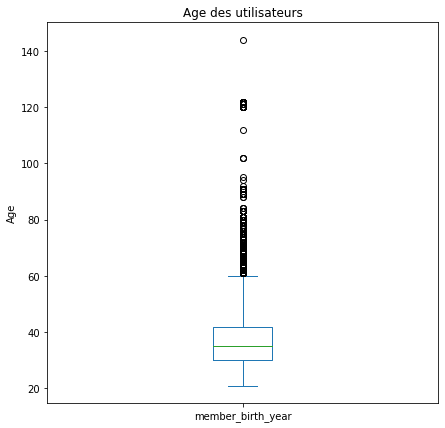

In [6]:
# Voir les outliers sur les années de naissance
plt.figure(figsize=(7,7))
(2022-df.member_birth_year).plot(kind='box')
plt.title("Age des utilisateurs")
plt.ylabel("Age")
plt.xlabel("")
plt.plot()

In [7]:
# suppression des données dont les dates de naissance sont supérieurs à 105
(( 2022 - df.member_birth_year )>=105).sum()
df.drop(df[(2022-df.member_birth_year)>=110].index,inplace=True)

> On constate des problèmes de qualité, <br>
> certaines colonnes ne sont pas aux bons formats

In [8]:
# Voir le nombre des lignes nulles pour chaque colonne
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [9]:
# Afficher une aperçu des données dont les stations id sont null
df[df.start_station_id.isnull()].head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
475,1709,2019-02-28 20:55:53.9320,2019-02-28 21:24:23.7380,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4211,Customer,1991.0,Female,No
1733,1272,2019-02-28 18:32:34.2730,2019-02-28 18:53:46.7270,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4174,Subscriber,1980.0,Male,No
3625,142,2019-02-28 17:10:46.5290,2019-02-28 17:13:09.4310,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.96,4283,Subscriber,1988.0,Male,No
4070,585,2019-02-28 16:28:45.9340,2019-02-28 16:38:31.3320,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.92,4089,Subscriber,1984.0,Male,Yes
5654,509,2019-02-28 12:30:17.1310,2019-02-28 12:38:46.3290,NaN,NaN,37.40,-121.92,NaN,NaN,37.39,-121.93,4089,Subscriber,1984.0,Male,Yes


In [10]:
# Aperçu de ceux dont les informations des membres sont null
df[df.member_birth_year.isnull()].head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
13,915,2019-02-28 23:49:06.0620,2019-03-01 00:04:21.8670,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,5101,Subscriber,NaN,NaN,No
28,650,2019-02-28 23:43:27.5030,2019-02-28 23:54:18.4510,258.0,University Ave at Oxford St,37.872355,-122.266447,263.0,Channing Way at San Pablo Ave,37.862827,-122.290231,4784,Customer,NaN,NaN,No
53,3418,2019-02-28 22:41:16.3620,2019-02-28 23:38:14.3630,11.0,Davis St at Jackson St,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,-122.398436,319,Customer,NaN,NaN,No
65,926,2019-02-28 23:17:05.8530,2019-02-28 23:32:32.6820,13.0,Commercial St at Montgomery St,37.794231,-122.402923,81.0,Berry St at 4th St,37.775880,-122.393170,2951,Subscriber,NaN,NaN,No


In [11]:
# Voir les differentes valeurs possible de la colonne sexe du Dataset
df.member_gender.unique()

array(['Male', nan, 'Other', 'Female'], dtype=object)

> Certaines colonnes présentent des valeurs nulles

In [12]:
# Compter les lignes dupliquer
df.duplicated().sum()

0

> Aucune ligne dupliqué

### Correction des données

In [13]:
# Eliminer les colonnes avec trop de valeur manquante
df.drop(['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude','start_station_id','end_station_id'], axis=1,inplace=True)

In [14]:
# Ajouter une colonne age pour mieux manipuler l'information
df["member_age"] = 2022 - df.member_birth_year

In [15]:
# Supprimer les lignes avec des valeurs manquante
df.dropna(inplace=True)

In [16]:
# Correction des types
df = df.astype({
    'start_time': 'datetime64', 
    'end_time': 'datetime64',  
    'member_gender' : 'category',
    'member_birth_year': 'int64',
    'bike_id': 'object',
    'user_type': 'category',
    'bike_share_for_all_trip': 'category',
    'member_age' : 'int64',
})

In [17]:
# Information et resumé general sur les données
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174880 entries, 0 to 183411
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174880 non-null  int64         
 1   start_time               174880 non-null  datetime64[ns]
 2   end_time                 174880 non-null  datetime64[ns]
 3   start_station_name       174880 non-null  object        
 4   end_station_name         174880 non-null  object        
 5   bike_id                  174880 non-null  object        
 6   user_type                174880 non-null  category      
 7   member_birth_year        174880 non-null  int64         
 8   member_gender            174880 non-null  category      
 9   bike_share_for_all_trip  174880 non-null  category      
 10  member_age               174880 non-null  int64         
dtypes: category(3), datetime64[ns](2), int64(3), object(3)
memory usage: 12.5+ MB


### What is the structure of your dataset?

> Notre dataset possède 174 880 Ligne et 11 Colonnes, dont 3 de types categorielles, 2 de types datetime,3 de types, et les restes de types objets.

### What is/are the main feature(s) of interest in your dataset?

> Notre principal objectif est de trouver les relations entre le nombre d'utilisation de bicyclette et les variables.
> Ce qui peut être la reponse au question : **Quels sont les facteurs qui entraîne l'utilisation des velos? (En temps et en nombre)**.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Mon attente au resultat de cette analyse c'est que, le nombre d'utilisation des velos ainsi que la durée d'utilisation serait beaucoup affecté par les utilisateurs (son type, son age) et les moments où a eu lieu l'utilisation du velo.

> C'est pour cette raison que nous avons decidé de garder les colonnes suivantes pour notre analyse:
> - **duration_sec**: pour pouvoir analyser la durée d'utilisation
> - **start_time** et **end_time**: pour pouvoir faire un rapprochement entre le moment et l'utilisation
> - **start_station_name** et **end_station_name**: pour voir la relation entre les stations et l'utilisation
> - **user_type**, **member_birth_year**, **member_gender** et **member_age**: permet de connaître la relation entre l'utilisateur et l'utilisation (durée et nombre)  
> - **bike_share_for_all_trip  et bike_id**: Nous permet de voir si autre que notre hypothèse de départ, se pourrait-il qu'il y a autre facteur que l'on doit prendre en compte

<span id="univarie"></span>
## Univariate Exploration



In [18]:
# Description de la distribution des données quantitative
df.describe()

,duration_sec,member_birth_year,member_age
count,174880.000000,174880.000000,174880.000000
mean,704.022358,1984.837957,37.162043
std,1642.514884,9.974001,9.974001
min,61.000000,1920.000000,21.000000
25%,323.000000,1980.000000,30.000000
50%,510.000000,1987.000000,35.000000
75%,789.000000,1992.000000,42.000000
max,84548.000000,2001.000000,102.000000


### Exploration basée sur la durée d'utilisation

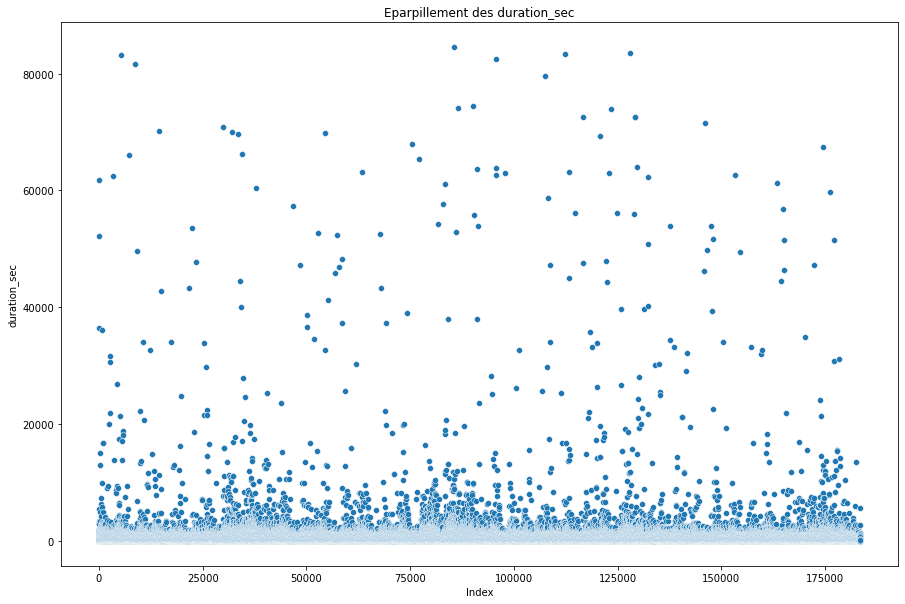

In [19]:
# Visualisation gnénérale des données sur la duration_sec
plt.figure(figsize=(15,10))
sb.scatterplot(x=df.index,y='duration_sec',data=df)
plt.title("Eparpillement des duration_sec")
plt.xlabel("Index")
plt.show()

In [20]:
# Distribution de la duration sec
df.duration_sec.value_counts()

272     308
323     285
305     282
369     280
274     276
       ... 
4080      1
2827      1
8199      1
3993      1
2822      1
Name: duration_sec, Length: 4429, dtype: int64

In [21]:
# Afficher une histogramme jusqu'a un certaine durée
def hist_until(duree,bns = 10):
    plt.figure(figsize=(10,5))
    bins = np.arange(0, duree,bns )
    plt.hist(data=df, x='duration_sec',bins=bins)
    plt.title(f"Distribution des durées (sur {duree} secondes)")
    plt.show()

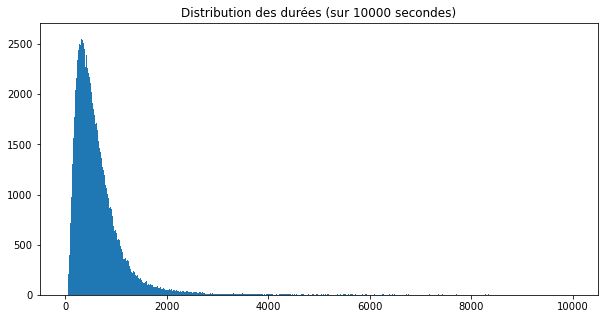

In [22]:
hist_until(10000)

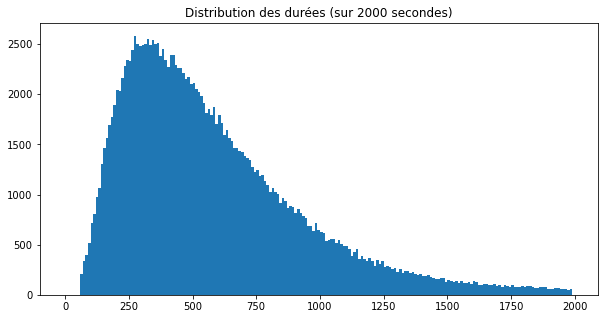

In [23]:
hist_until(2000)

> On a une distribution à droite

> La majorité de toutes les valeurs sont compris entre 61 et 1500

### Exploration basé sur les dates et heures

#### Jours de la semaine

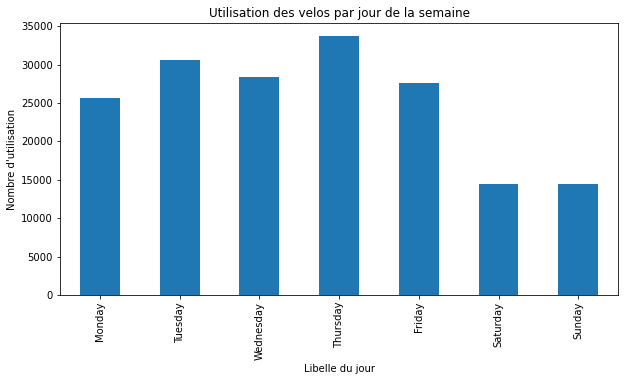

In [24]:
# BAsée sur les jours de la semaine
by_day = pd.DataFrame(df.start_time.dt.day_name().value_counts());
# Definir un ordre
jours = ['Monday','Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday'];
plt.figure(figsize=(10,5))
df.start_time.dt.day_name().value_counts()[jours].plot(kind='bar')
plt.title("Utilisation des velos par jour de la semaine")
plt.xlabel("Libelle du jour")
plt.ylabel("Nombre d'utilisation")
plt.show()

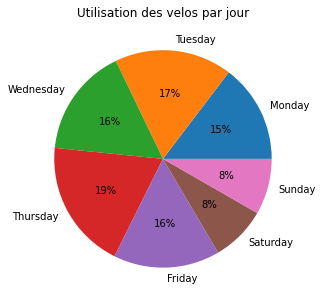

In [25]:
plt.figure(figsize=(10,5))
df.start_time.dt.day_name().value_counts()[jours].plot(kind='pie',autopct='%.0f%%')
plt.title("Utilisation des velos par jour")
plt.xlabel("")
plt.ylabel("")
plt.show()

> On peut en deduire que il n'y a pas beaucoup d'utilisation les weekends

#### Heure

In [26]:
def usage_par_heure(heure):
    data = df[heure].dt.hour.value_counts().sort_index()
    jours = data.index
    plt.figure(figsize=(10,5))
    data.plot(kind='bar')
    plt.title("Distribution de l'utilisation par heure")
    plt.xlabel("Date du jour")
    plt.ylabel("Nombre d'utilisation")
    plt.show()

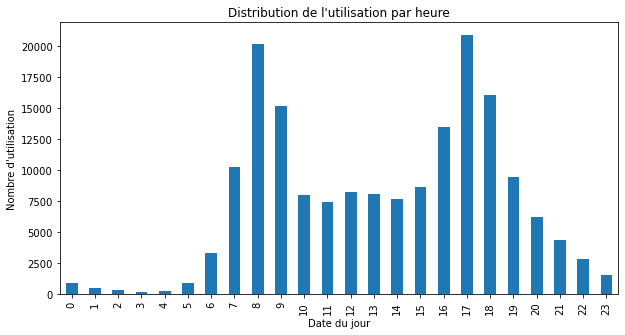

In [27]:
# Basée su l'heure de départ
usage_par_heure('start_time')

> Les usagers ont une préférence de fair un tour dans la journée <br>
> au debut de la journée vers 8h et vers la fin de la journée 17h.<br><br>
> C'est rare qu'il y a des usagers la nuit

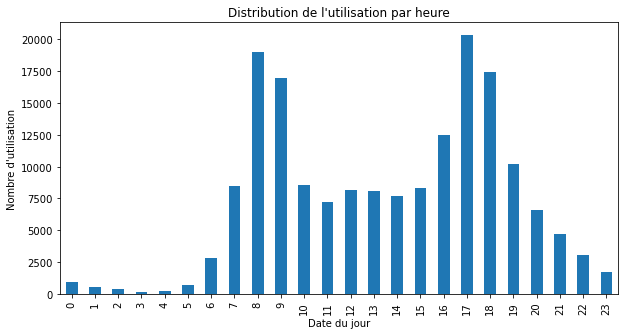

In [28]:
# Basée su l'heure d'arrivé
usage_par_heure('end_time')

> Il n'y a pas vraiement de préférence basée sur la date de din d'utilisation.

#### Jours du mois

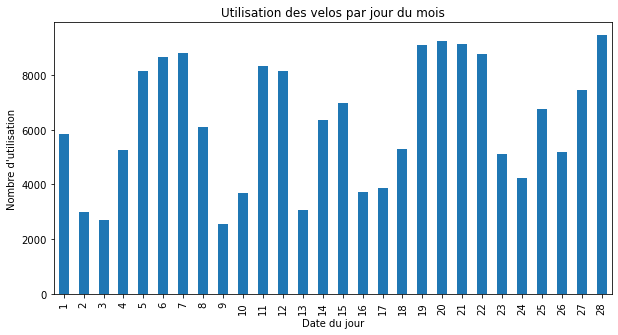

In [29]:
# Basée sur les jours du mois 
plt.figure(figsize=(10,5))
df.start_time.dt.day.value_counts().sort_index().plot(kind='bar')
plt.title("Utilisation des velos par jour du mois")
plt.xlabel("Date du jour")
plt.ylabel("Nombre d'utilisation")
plt.show()

> Pas on ne peut en tirer grand chose de la représentation par jour du mois

#### Mois de l'année

In [30]:
# Voir les mois existant dans le dataset
by_month = pd.DataFrame(df.start_time.dt.month_name().value_counts());
print(by_month)

          start_time
February      174880


#### Année

In [31]:
# Voir les années existantes
df.start_time.dt.year.unique()

array([2019], dtype=int64)

> Les données que l'on possède actuellement sont des échantillons sur l'utilisation que sur une seule mois, le mois de `fevrier 2019`.

### Exploration basée sur les stations

In [32]:
# Voir tous les noms des stations
df.start_station_name.unique()

array(['Montgomery St BART Station (Market St at 2nd St)',
       'Market St at Dolores St', 'Grove St at Masonic Ave',
       'Frank H Ogawa Plaza', '4th St at Mission Bay Blvd S',
       'Palm St at Willow St', 'Washington St at Kearny St',
       'Post St at Kearny St', 'Jones St at Post St',
       'Civic Center/UN Plaza BART Station (Market St at McAllister St)',
       'Valencia St at 21st St', 'Bancroft Way at College Ave',
       'Howard St at Mary St', '22nd St at Dolores St',
       'Laguna St at Hayes St', '5th St at Folsom',
       'Telegraph Ave at 23rd St', 'Page St at Scott St',
       'Lake Merritt BART Station', 'West St at 40th St',
       'The Embarcadero at Sansome St', 'Folsom St at 9th St',
       'University Ave at Oxford St', 'MLK Jr Way at University Ave',
       'The Embarcadero at Bryant St', '17th St at Valencia St',
       'Valencia St at 16th St', 'Valencia St at 22nd St',
       'Franklin Square', 'San Pablo Ave at MLK Jr Way',
       '19th St at Mission 

In [33]:
# Afficher le nombre des stations de départ
df.start_station_name.unique().shape

(329,)

In [34]:
# Afficher le nombre des stations d'arrivé
df.end_station_name.unique().shape

(329,)

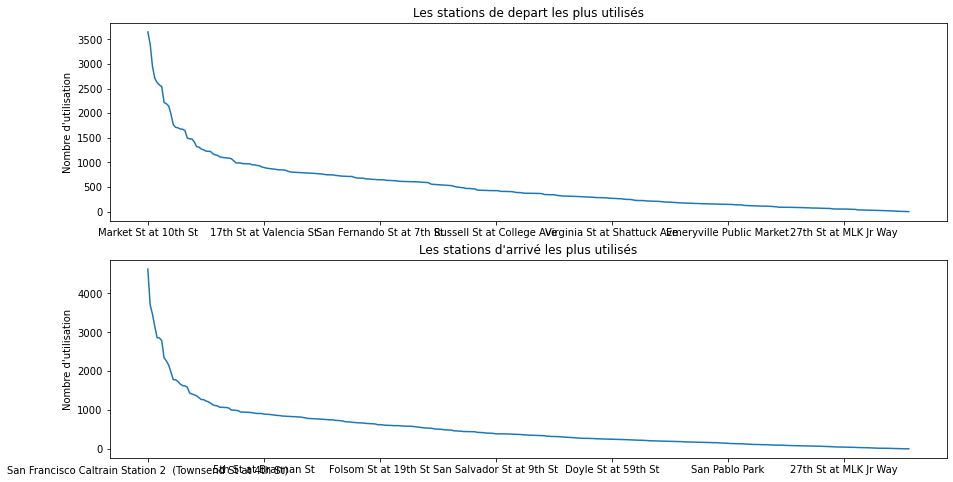

In [35]:
# Afficher un graphique representant les stations les plus utilisés
fig,ax = plt.subplots(nrows=2,figsize=(15,8))
df.start_station_name.value_counts().plot(kind='line',ylabel = "Nombre d'utilisation",title="Les stations de depart les plus utilisés", ax=ax[0])
df.end_station_name.value_counts().plot(kind='line',ylabel = "Nombre d'utilisation",title="Les stations d'arrivé les plus utilisés", ax=ax[1])
plt.show()

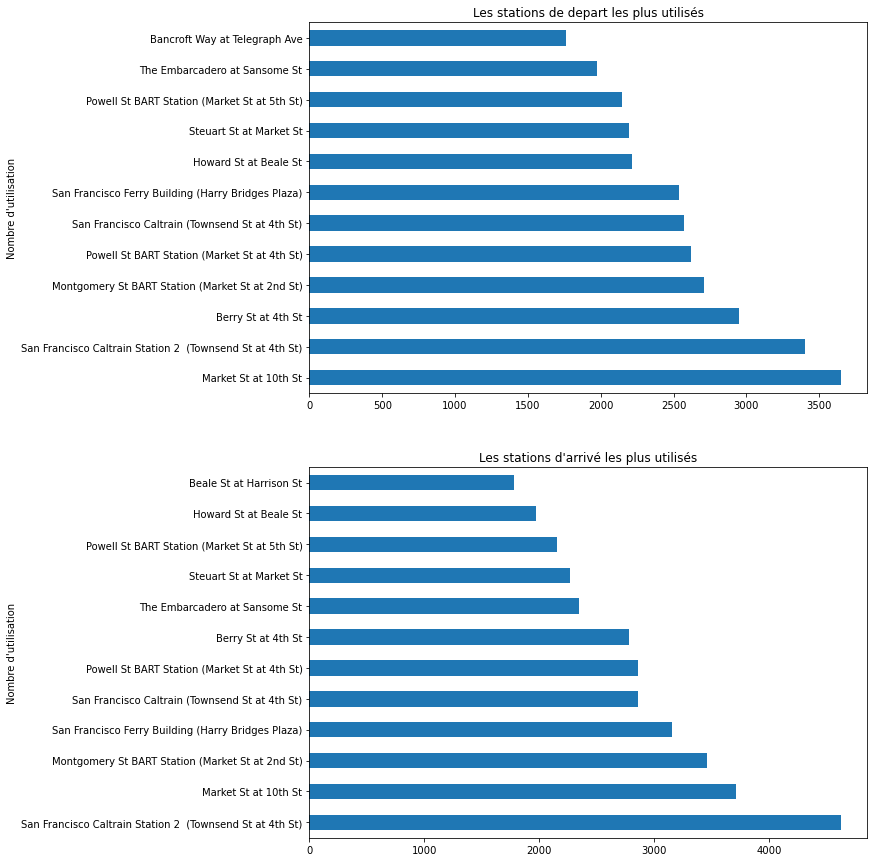

In [36]:
# Les stations de départ les plus utilisés
fig,ax = plt.subplots(nrows=2,figsize=(10,15))
df.start_station_name.value_counts()[:12].plot(kind='barh',ylabel = "Nombre d'utilisation",title="Les stations de depart les plus utilisés", ax=ax[0])
df.end_station_name.value_counts()[:12].plot(kind='barh',xlabel = "Nombre d'utilisation",title="Les stations d'arrivé les plus utilisés", ax=ax[1])
plt.show()

> Ce sont les stations les plus populaires

In [37]:
# Comparer la proportion de ceux qui reviennent à leur point de depart et ceux qui ne reviennent pas
is_returned = df.start_station_name==df.end_station_name
is_returned.replace({False: 'NON',True:'OUI'},inplace=True)
is_returned.head()

0    NON
2    NON
3    NON
4    NON
5    NON
dtype: object

In [38]:
# Nombre des utilisations qui sont rétournés au station de départ
is_returned.value_counts()

NON    171422
OUI      3458
dtype: int64

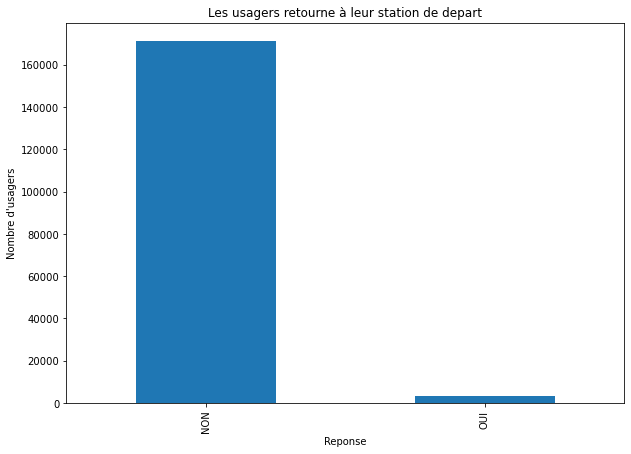

In [39]:
# Representer graphiquement le resultat
fig,ax = plt.subplots(figsize=(10,7))
is_returned.value_counts().plot(kind='bar')
plt.title("Les usagers retourne à leur station de depart")
plt.xlabel("Reponse")
plt.ylabel("Nombre d'usagers")
plt.show()

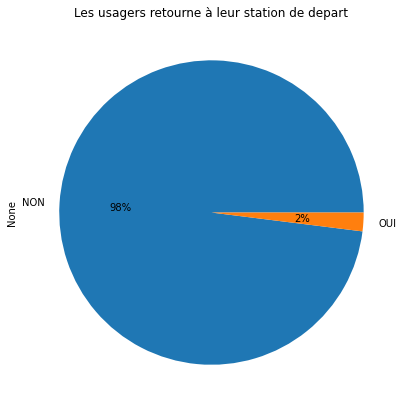

In [40]:
# En terme de pourcentantge quelle est la différence
fig,ax = plt.subplots(figsize=(10,7))
is_returned.value_counts().plot(kind='pie',autopct='%.0f%%')
plt.title("Les usagers retourne à leur station de depart")
plt.show()

> La majorité des usagers ne retourne pas à

### Exploration basée sur les velos

In [41]:
# Apercu de la valeur de la colonne Bike_id
df.bike_id.unique()

array([4902, 5905, 6638, ..., 2861, 3655, 5067], dtype=object)

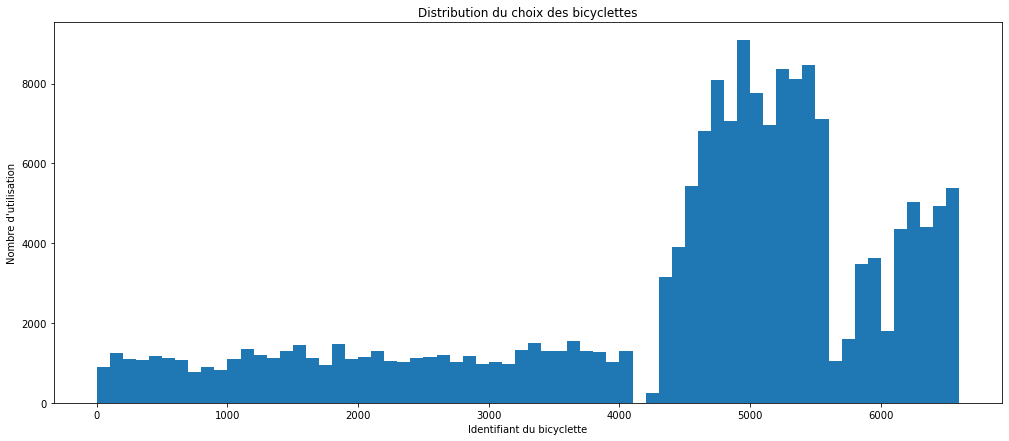

In [42]:
# Distribution de l'utilisation par Bicyclette
plt.figure(figsize=(17,7))
plt.hist(data = df,x='bike_id',bins=np.arange(0,df.bike_id.max(),100))
plt.title("Distribution du choix des bicyclettes")
plt.xlabel("Identifiant du bicyclette")
plt.ylabel("Nombre d'utilisation")
plt.show()

> Certains bicyclettes sont plus favorisés que d'autres

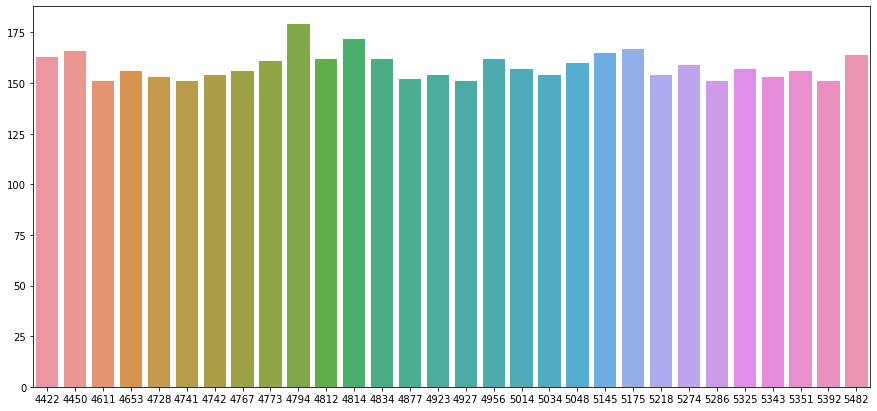

In [43]:
# 30 velos les plus utilisés
plt.figure(figsize=(15,7))
data = df.bike_id.value_counts().head(30)
sb.barplot(x = data.index,y=data.values)
plt.show()

> Ces sont les bicyclettes les plus célèbres

### Exploration basée sur les usagers

#### Type d'utilisateur

In [44]:
# Liste des types d'utilisateur
df.user_type.unique()

['Customer', 'Subscriber']
Categories (2, object): ['Customer', 'Subscriber']

D:\INSTALLED\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


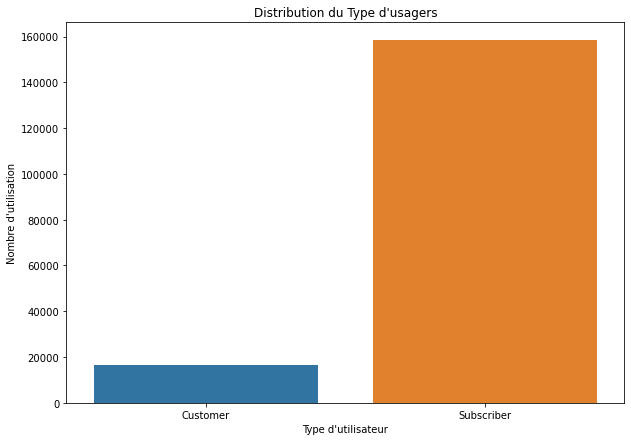

In [45]:
# Representer graphiquement la disctribution
plt.figure(figsize=(10,7))
sb.countplot(df.user_type)
plt.title("Distribution du Type d'usagers")
plt.xlabel("Type d'utilisateur")
plt.ylabel("Nombre d'utilisation")
plt.show()

plt.figure(figsize=(10,7))
df.user_type.value_counts().plot(kind='pie',autopct='%.0f%%')
plt.title("Distribution du Type d'usagers")
plt.xlabel("")
plt.ylabel("")
plt.show()

> Il y a largement de Subscriber que de custumer

#### Age de l'utiliateur

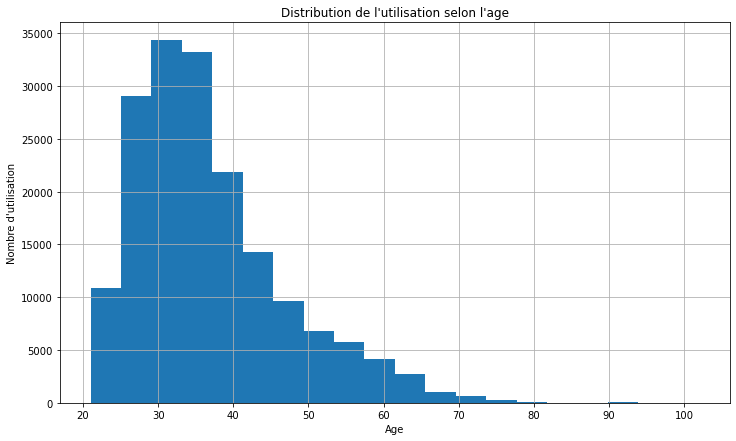

In [46]:
# Distribution de l'utilisation selon l'age
plt.figure(figsize=(12,7))
df.member_age.hist(bins=int(df.member_age.max()/5)) # On veut voir les variations pour chaque 5 ans
plt.title("Distribution de l'utilisation selon l'age")
plt.xlabel("Age")
plt.ylabel("Nombre d'utilisation")
plt.show()

> Les utilisateurs sont les plus nombreux entre 25 et 40 ans

#### Sexe de l'utilisateur

D:\INSTALLED\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


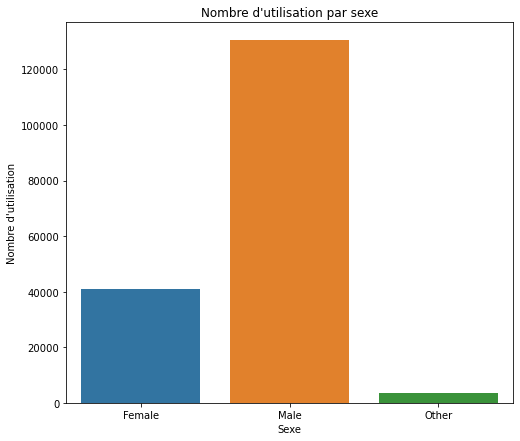

In [47]:
# Distribution selon le sexe de l'utilisateur
plt.figure(figsize=(8,7))
sb.countplot(df.member_gender)
plt.xlabel("Sexe")
plt.ylabel("Nombre d'utilisation")
plt.title("Nombre d'utilisation par sexe")
plt.show()

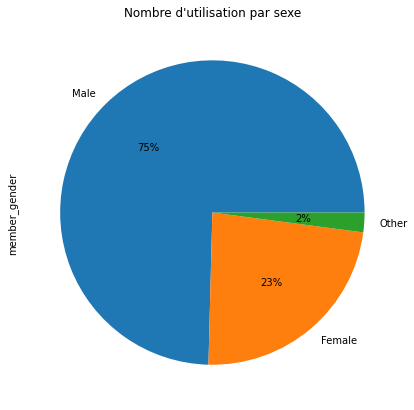

In [48]:
# voir la proportion du sexe en pourcentage
plt.figure(figsize=(8,7))
df.member_gender.value_counts().plot(kind='pie',autopct='%.0f%%')
plt.title("Nombre d'utilisation par sexe")
plt.show()

> Le nombre des hommes sont largement superieurs au nombre des femmes et les autres sexes combinées

### Exploration basée sur les types de velo

In [49]:
# Les valeurs possible du bike_share_for_all_trip
df.bike_share_for_all_trip.unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

In [50]:
# Nombre pour chaque valeur
df.bike_share_for_all_trip.value_counts()

No     157561
Yes     17319
Name: bike_share_for_all_trip, dtype: int64

D:\INSTALLED\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


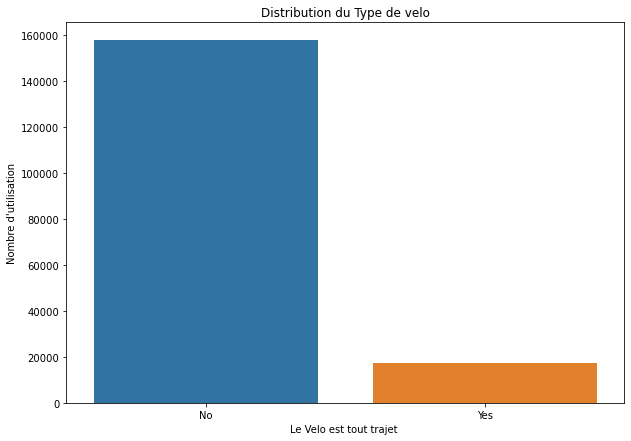

In [51]:
# Afficher la distribution 
plt.figure(figsize=(10,7))
sb.countplot(df.bike_share_for_all_trip)
plt.title("Distribution du Type de velo")
plt.xlabel("Le Velo est tout trajet ")
plt.ylabel("Nombre d'utilisation")
plt.show()

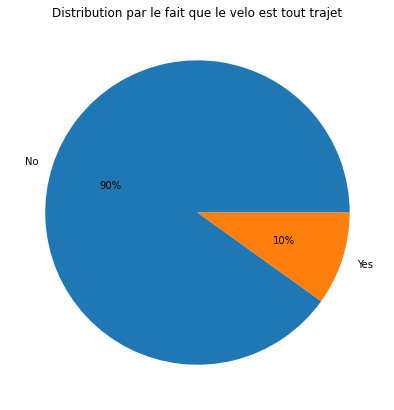

In [52]:
# Distribution par le fait que le velo est tout trajet
plt.figure(figsize=(10,7))
df.bike_share_for_all_trip.value_counts().plot(kind='pie',autopct='%.0f%%')
plt.title("Distribution par le fait que le velo est tout trajet")
plt.xlabel("")
plt.ylabel("")
plt.show()

> Il y a plus d'utilisation pour les velos qui ne sont pas tout trajet

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Concernant la variable **duration_sec**, c'est une distribution à gauche dont la majorité des valeurs sont compris entre 0-1500. Les utilisateurs ont donc une préférence pour les tours de courte durée.<br><br>
> Certains points sont intéréssant du côté de la date de départ, sur laquelle on peut etudier les comportements des utilisateurs par **jour de la semaine**, **jour dans un mois** et par mois. On a pu en deduire que quelques fait. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Le plus grand point sur le données étudier c'est la présence des valeurs manquantes sur certaines colonne. puisqu'il n'y avais pas vraiement de très grande impacte sur notre étude et que l'on ne peut pas trouver des valeurs neutre pour les ramplacer, on a decider de supprimer les lignes comportant les valeurs manquantes.

<span id="bivarie"></span>
## Bivariate Exploration


### Distribution des types d'utilisateurs par Jour de la semaine

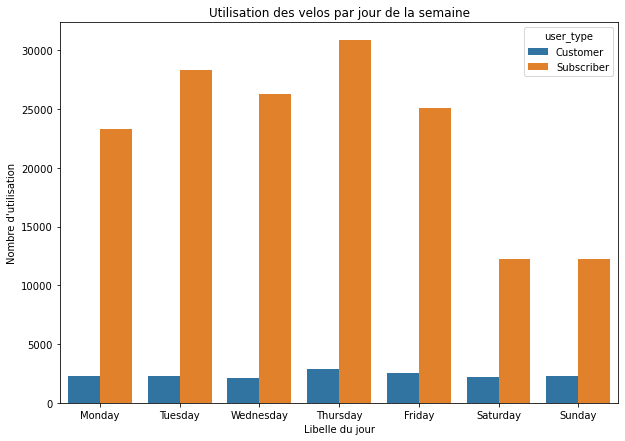

In [53]:
plt.figure(figsize=(10,7))
# df.start_time.dt.day_name().value_counts()[jours].plot(kind='bar')
df['day_name'] = df.start_time.dt.day_name()
sb.countplot(x='day_name',hue='user_type',order=jours,data=df)
plt.title("Utilisation des velos par jour de la semaine")
plt.xlabel("Libelle du jour")
plt.ylabel("Nombre d'utilisation")
plt.show()

> Tandis que les nombre d'utilisation des **Customers** ne varie pas beaucoup au long de la semaine, <br>
> ceux des **Subscriber** sont plus nombreux les jours ouvrables et moins nombreux le weekend.

### Distribution des types d'utilisateurs par Heure de la Journée

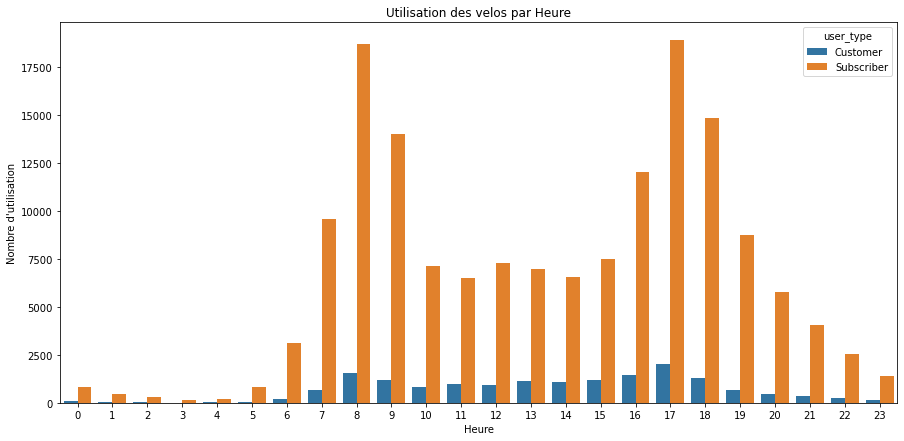

In [54]:
# Representer par une tranche de 24h l'utilisation des velos par type d'utilisateur
plt.figure(figsize=(15,7))
df['hours'] = df.start_time.dt.hour
sb.countplot(x='hours',hue='user_type',data=df)
plt.title("Utilisation des velos par Heure")
plt.xlabel("Heure")
plt.ylabel("Nombre d'utilisation")
plt.show()

> La tendance est à peu prêt pareil pour les utilisations des **Customer** et les **Subscriber** si on se réfère au jours dans un mois. Il y a plus d'utilisation en milieu de mois qu'au debut et à la fin.

### Durée d'utilisation par rapport à l'age

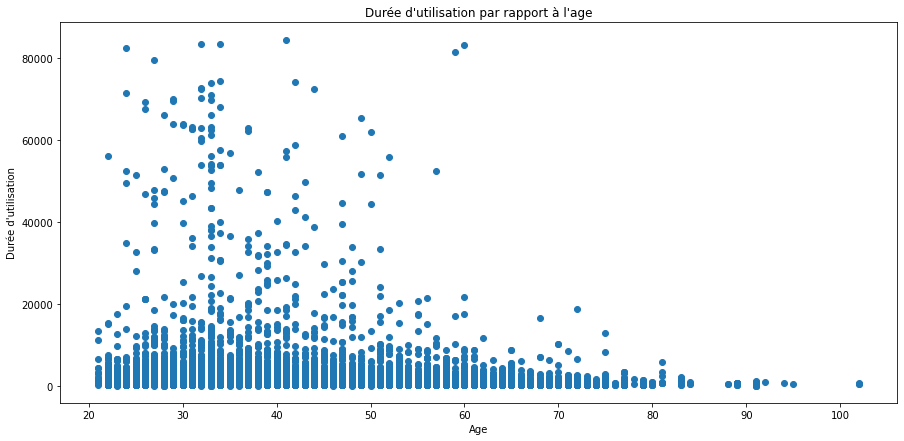

In [55]:
# afficher la distribution de la durée d'utilisation en fonction de l'age
plt.figure(figsize=(15,7))
plt.scatter(data = df, x = 'member_age', y = 'duration_sec')
plt.title("Durée d'utilisation par rapport à l'age")
plt.xlabel("Age")
plt.ylabel("Durée d'utilisation")
plt.show()

> La durée des utilisations diminues avec l'age

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> On a observé que l'utilisation peut varié en fonction du jours de la semaine, ainsi que des informations sur l'utilisateur (son age, son type). Ceci a repondu au question que nous avons posé au début de l'analyse.  
> Les **Subscribers** par exemple sont plus nombreux les jours ouvrables et moins nombreux le weekend.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Autre que cela, nous avons observé chez les autres variables que les velos qui ne sont pas tout trajet sont plus utilisé que les autres. De plus, certaines velos 

<span id="mutlivarie"></span>
## Multivariate Exploration

> On va maintenant voir la relation entre la durée et l'utilisation journalière par type d'utilisateur

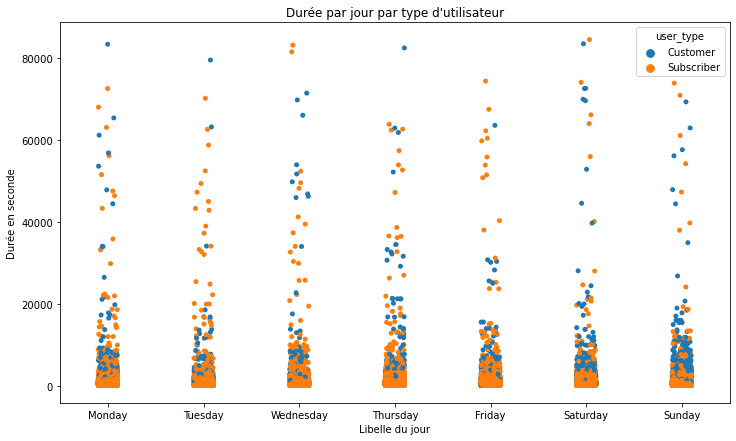

In [56]:
# variable concernée : duration_sec, day_name, user_type
plt.figure(figsize=(12,7))
# sb.countplot(x='day_name',hue='user_type',order=jours,data=df)
df['day_name'] = df.start_time.dt.day_name()
sb.stripplot(data=df,x='day_name',y='duration_sec', hue='user_type',order=jours)
plt.title("Durée par jour par type d'utilisateur")
plt.xlabel("Libelle du jour")
plt.ylabel("Durée en seconde")
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Dans cette exploration mutlivarié, nous voulons voir la relation entre la durée et l'utilisation journalière par type d'utilisateur. La duré des tours sont dans la majorité en desous de 20000 secondes et que les **subscribers** se font rare le weekend. Cela ne fait que confirmer les observations précédentes.

### Were there any interesting or surprising interactions between features?

> On ne peut en tirer grand chose sur la dernière exploration, à part le fait qu'il renforce nos observations antérieurs

<span id="conclusions"></span>
## Conclusions


<span style="margin-right: 50px;"></span>Nous avons pu constater tout au long de cette exploration du données **Ford GoBike** que, le dataset de départ comporte des valeurs manquantes et des colonnes dans la mauvaise format qui necéssite de la nettoyage au début de l'opération. Puis, lors des exploration des données, la majorité des tours ont un temps inférieur à 1500 secondes.<br>
<span style="margin-right: 50px;"></span>Il peut aussi être important de retenir le fait que les utilisateurs sont plus actif lors des **week-days** que les **week-end** plus précisement les utilisateurs de type **Subscriber**. Bien que les Subscriber sont plus nombreuses que les **Customer** notre analyse s'est basée sur les proportions. En faisant l'exploration par rapport à l'âge, on peut dire que la majorité les utilisateurs les plus actifs sont entre 25 et 40 ans et la durée des utilisations diminues avec l'âge. </br>
<span style="margin-right: 50px;"></span>Lors de l'analyse de la distribution horaire, on constate que les utilisateurs en général sont actifs dans l'utilisation des velos entre 7h et 20h. Le préférence des utilisateurs sont les velos qui ne sont pas tout trajet.

In [57]:
df.to_csv("cleaned_data.csv", index=False)